## Computer Vision- Assignment 1

### Rohan Khaitan - MDS201812

### Importing necessary libraries

In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from skimage.exposure import rescale_intensity

### Working Directory

In [2]:
os.chdir('/home/rohan/CMI/SEM_4/Computer_Vision/Assignment_1')

### Problem 1

### Read Image

In [219]:
hill_img = cv2.imread('Images/Images/hill.png')
parrot_img= cv2.imread('Images/Images/parrot.png')
cameraman_img= cv2.imread('Images/Images/cameraman.tif')
cheetah_img= cv2.imread('Images/Images/cheetah.png')
dog_img =cv2.imread("Images/Images/5uyrc8opy9uy.jpg")
nature_img =cv2.imread("Images/Images/nature.jpeg")
human_img =cv2.imread("Images/Images/human.jpeg")

#### Original image to gray scale image 

In [4]:
hill_gray = cv2.cvtColor(hill_img, cv2.COLOR_BGR2GRAY)

### Save the image

In [5]:
cv2.imwrite('Images/output_images/hill_gray.png',hill_gray)

True

In [6]:
## It is BGR format. So to plot the image using matplot we need to convert it to RGB format.
hill = cv2.cvtColor(hill_img, cv2.COLOR_BGR2RGB)
hill_gray_scale = cv2.cvtColor(hill_gray, cv2.COLOR_BGR2RGB)

### Visualize the actual image and the grayscale image

Text(0.5, 1.0, 'In Gray Scale')

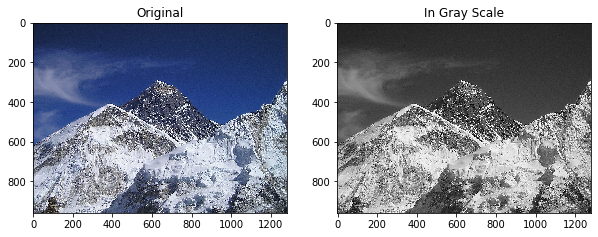

In [7]:
f, axarr = plt.subplots(1,2)
f.set_figheight(10)
f.set_figwidth(10)
axarr[0].imshow(hill)
axarr[1].imshow(hill_gray_scale)
axarr[0].set_title("Original")
axarr[1].set_title('In Gray Scale')

In [8]:
print("Shape of the original Hill image:",hill_img.shape)
print("Shape of the Hill image in gray scale:",hill_gray.shape)

Shape of the original Hill image: (960, 1280, 3)
Shape of the Hill image in gray scale: (960, 1280)


## Problem 2

In [9]:
einstein_img = cv2.imread('Images/Images/einstein.jpg')

In [10]:
einstein = cv2.cvtColor(einstein_img, cv2.COLOR_BGR2RGB)

#### Visualize the image

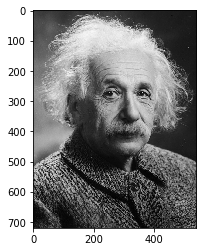

In [11]:
imgplot = plt.imshow(einstein)
plt.show()

### Bits per integer

In [12]:
einstein_img.dtype

dtype('uint8')

Data type is uint8 i.e unsigned integer number stored with 8 bit. </br>
So the bits per integer in the image: 8

### Height and Width of the image

In [13]:
height=einstein_img.shape[0]
width=einstein_img.shape[1]
print("Height of the image:",height,"Pixels")
print("Width of the image:",width,"Pixels")

Height of the image: 720 Pixels
Width of the image: 540 Pixels


### Converting to double-precision array

In [14]:
einstein_double= einstein_img.astype("double")

In [15]:
einstein_double

array([[[ 61.,  61.,  61.],
        [ 62.,  62.,  62.],
        [ 61.,  61.,  61.],
        ...,
        [ 25.,  25.,  25.],
        [ 25.,  25.,  25.],
        [ 25.,  25.,  25.]],

       [[ 57.,  57.,  57.],
        [ 63.,  63.,  63.],
        [ 61.,  61.,  61.],
        ...,
        [ 24.,  24.,  24.],
        [ 24.,  24.,  24.],
        [ 24.,  24.,  24.]],

       [[ 62.,  62.,  62.],
        [ 62.,  62.,  62.],
        [ 59.,  59.,  59.],
        ...,
        [ 23.,  23.,  23.],
        [ 24.,  24.,  24.],
        [ 24.,  24.,  24.]],

       ...,

       [[ 23.,  23.,  23.],
        [ 16.,  16.,  16.],
        [ 13.,  13.,  13.],
        ...,
        [127., 127., 127.],
        [ 47.,  47.,  47.],
        [ 38.,  38.,  38.]],

       [[ 21.,  21.,  21.],
        [ 16.,  16.,  16.],
        [ 13.,  13.,  13.],
        ...,
        [117., 117., 117.],
        [ 73.,  73.,  73.],
        [ 31.,  31.,  31.]],

       [[ 17.,  17.,  17.],
        [ 17.,  17.,  17.],
        [ 16.,  

### Problem - 2(b)

### Linear Transform

In [16]:
shift=np.min(einstein_img) 
scale=(np.max(einstein_img)-np.min(einstein_img))

In [17]:
transformed_einstein= (einstein_img-shift)/scale

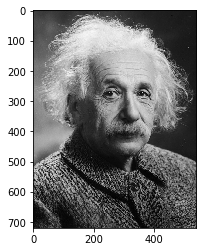

In [18]:
imgplot = plt.imshow(transformed_einstein)
plt.show()

In [19]:
transformed_einstein.shape

(720, 540, 3)

#### Multiplying the intensity values by the maximum value for the representation  

In [20]:
multiply_transformed_einstein= transformed_einstein*255
multiply_transformed_einstein= multiply_transformed_einstein.astype("uint8")

### Displaying the image

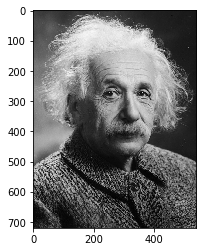

In [21]:
imgplot = plt.imshow(multiply_transformed_einstein)
plt.show()

Here the image remains the same. 

### Save the image

In [22]:
cv2.imwrite('Images/output_images/einstein_transformed.png',multiply_transformed_einstein)

True

### Problem -4

### Function to get padded image

In [78]:
def padding(image,pad_type,width=[10,10,10,10]):    ## Default width in all the 4 sides set to be 10
    
        #    We can ask for the widths for all dimensions using following code-
        #     print("Please enter the border width in no of pixels : ")
        #     top = int(input("For Top :"))
        #     bottom = int(input("For Bottom :"))
        #     left = int(input("For Left :"))
        #     right = int(input("For Right :"))
        
    top,bottom,left,right= width[0],width[1],width[2],width[3]

    if pad_type=="Replicate" or pad_type== "Clamp":
        output= cv2.copyMakeBorder(image,top,bottom,left,right,cv2.BORDER_REPLICATE)
    elif pad_type=="Mirror" or pad_type=="Reflect":
        output = cv2.copyMakeBorder(image,top,bottom,left,right,cv2.BORDER_REFLECT)
    elif pad_type=="Zero":
        output= cv2.copyMakeBorder(image,top,bottom,left,right,cv2.BORDER_CONSTANT,value=(0,0,0))
    elif pad_type=="Constant":
        print("Please enter the RGB values for the color you want to pad the image with:")
        v1 = int(input("Value for B channel: "))
        v2 = int(input("Value for G channel: "))
        v3 = int(input("Value for R channel: "))
        output= cv2.copyMakeBorder(image,top,bottom,left,right,cv2.BORDER_CONSTANT,value=(v1,v2,v3))
    else:
        output="Sorry, Wrong arguemnts/input"
        return output
    #output = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
    return(output)    

### Testing our function in different images

#### Testing clamp padding 

Text(0.5, 1.0, 'Padded')

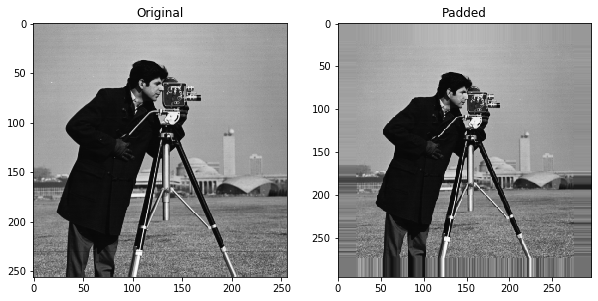

In [79]:
padded_cameraman= padding(cameraman_img, "Clamp",[20,20,20,20])
padded_cameraman_rgb = cv2.cvtColor(padded_cameraman, cv2.COLOR_BGR2RGB)
f, axarr = plt.subplots(1,2)
f.set_figheight(10)
f.set_figwidth(10)
axarr[0].imshow(cameraman_img)
axarr[1].imshow(padded_cameraman_rgb)
axarr[0].set_title("Original")
axarr[1].set_title('Padded')

In [25]:
cv2.imwrite('saved_images/clamp_padded_cameraman.png',padded_cameraman)

True

#### Testing zero padding 

Text(0.5, 1.0, 'Padded')

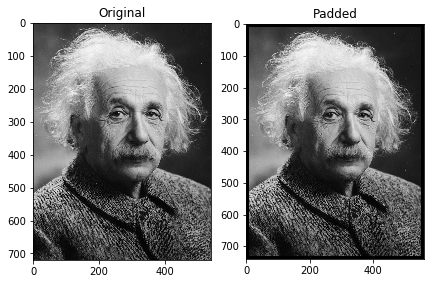

In [80]:
padded_einstein= padding(einstein_img,"Zero",[10,10,10,10])
f, axarr = plt.subplots(1,2)
f.set_figheight(10)
f.set_figwidth(7)
axarr[0].imshow(einstein)
axarr[1].imshow(padded_einstein)
axarr[0].set_title("Original")
axarr[1].set_title('Padded')

In [81]:
dog = cv2.cvtColor(dog_img, cv2.COLOR_BGR2RGB) 

Text(0.5, 1.0, 'Padded')

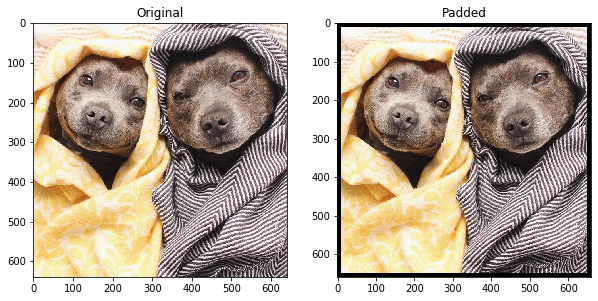

In [82]:
padded_dog= padding(dog_img,"Zero",[10,10,10,10])
f, axarr = plt.subplots(1,2)
f.set_figheight(10)
f.set_figwidth(10)
padded_dog_rgb= cv2.cvtColor(padded_dog, cv2.COLOR_BGR2RGB)
axarr[0].imshow(dog)
axarr[1].imshow(padded_dog_rgb)
axarr[0].set_title("Original")
axarr[1].set_title('Padded')

In [29]:
cv2.imwrite('saved_images/zero_padded_dog.png',padded_dog)

True

#### Testing constant padding 

Please enter the RGB values for the color you want to pad the image with:
Value for B channel: 0
Value for G channel: 255
Value for R channel: 255


Text(0.5, 1.0, 'Padded')

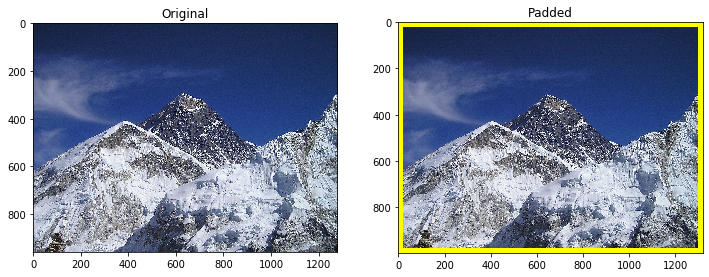

In [84]:
padded_hill= padding(hill_img,"Constant",[20,20,20,20])
f, axarr = plt.subplots(1,2)
f.set_figheight(12)
f.set_figwidth(12)
padded_hill_rgb= cv2.cvtColor(padded_hill, cv2.COLOR_BGR2RGB)
axarr[0].imshow(hill)
axarr[1].imshow(padded_hill_rgb)
axarr[0].set_title("Original")
axarr[1].set_title('Padded')

In [33]:
cv2.imwrite('saved_images/constant_padded_hill.png',padded_hill)

True

#### Testing Mirror padding 

Text(0.5, 1.0, 'Padded')

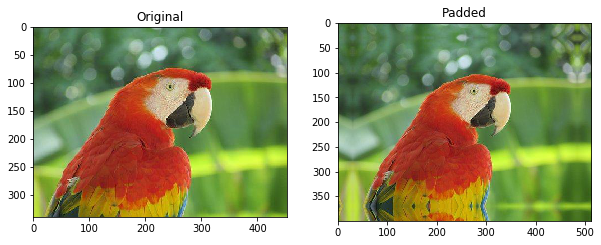

In [86]:
padded_parrot= padding(parrot_img,"Mirror",[30,30,30,30])
f, axarr = plt.subplots(1,2)
f.set_figheight(15)
f.set_figwidth(10)
parrot = cv2.cvtColor(parrot_img, cv2.COLOR_BGR2RGB)
padded_parrot_rgb= cv2.cvtColor(padded_parrot, cv2.COLOR_BGR2RGB)

axarr[0].imshow(parrot)
axarr[1].imshow(padded_parrot_rgb)
axarr[0].set_title("Original")
axarr[1].set_title('Padded')

In [36]:
cv2.imwrite('saved_images/Mirror_padded_parrot.png',padded_parrot)

True

### Padding results

Text(0.5, 1.0, 'Mirror Padding')

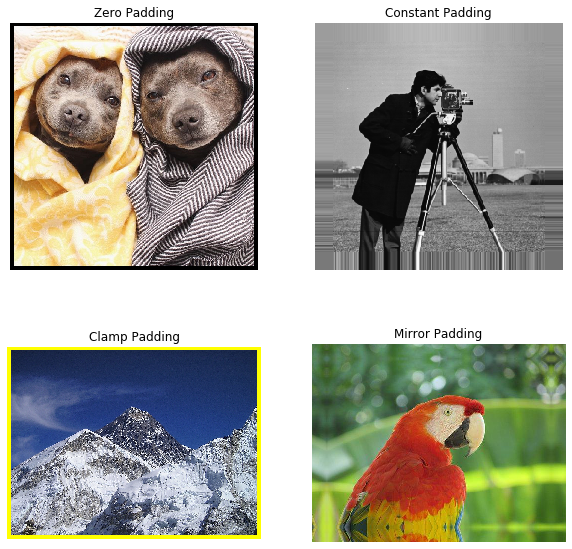

In [87]:
f, axarr = plt.subplots(2,2)
f.set_figheight(10)
f.set_figwidth(10)
axarr[0,0].imshow(padded_dog_rgb)
axarr[0,0].axis('off')
axarr[0,1].imshow(padded_cameraman_rgb)
axarr[0,1].axis('off')
axarr[1,0].imshow(padded_hill_rgb)
axarr[1,0].axis('off')
axarr[1,1].imshow(padded_parrot_rgb)
axarr[1,1].axis('off')


axarr[0,0].set_title("Zero Padding")
axarr[0,1].set_title('Constant Padding')
axarr[1,0].set_title('Clamp Padding')
axarr[1,1].set_title('Mirror Padding')

### Problem -5

### Convolve function

In [101]:
## The following function works for a gray scale image.
## For a coloured image we can separate the R, G, B channels and
#  pass them as input separately and merge them to get the final convolved image.

def convolve(image, kernel,pad_type="Mirror"):
    
    ## Image and kernel shape
    (iH, iW) = image.shape[:2]
    (kH, kW) = kernel.shape[:2]
 
    ## We want to pad to keep the same shape of the original image 
    ## pad width depends on the kernel width
    
    pad = (kW - 1) // 2
    pad_width=[pad,pad,pad,pad]
    
    ## Here the padding function is used (which is written earlier)
    
    image = padding(image,pad_type,pad_width)
    ## create a output numpy array which will store the convolved values
    output = np.zeros((iH, iW), dtype="float32")
    for y in np.arange(pad, iH + pad):
        for x in np.arange(pad, iW + pad):
            # extract the ROI of the image by extracting the
            # *center* region of the current (x, y)-coordinates
            # dimensions
            roi = image[y - pad:y + pad + 1, x - pad:x + pad + 1]
            ## Here the actual convolution operation is performed,
            # it does element wise multiplication between the ROI and
            # the kernel, then summing the matrix
            
            k = (roi * kernel).sum()
 
            # store the convolved value in the output (x,y)-
            # coordinate of the output image
            output[y - pad, x - pad] = k
            # rescale the output image to be in the range [0, 255]
    output = rescale_intensity(output, in_range=(0, 255))
    output = (output * 255).astype("uint8")
 
    # return the output image array
    return output

### If we have an image and a kernel then the following function will return the array of output image

In [102]:
def filter_output(image,kernel,pad_type= "Mirror"):
    if len(image.shape)==2 :
        convoleOutput= convolve(image,kernel,pad_type)
    elif len(image.shape)==3 :
        b, g, r   = image[:, :, 0], image[:, :, 1], image[:, :, 2] # For RGB image
        convolveOutput_b= convolve(b, kernel,pad_type)
        convolveOutput_g= convolve(g, kernel,pad_type)
        convolveOutput_r= convolve(r, kernel,pad_type)
        convoleOutput = np.dstack((convolveOutput_r,convolveOutput_g,convolveOutput_b))  # stacks 3 h x w arrays -> h x w x 3
    else:
        return("Image not in RGB/BGR/Black & White Format")
    return convoleOutput    

### Separable Filter

#### Here we just modify the previous function so that we can give vertical and horizontal kernel as input

In [103]:
def output_convolved_image(image,v_ker, h_ker, pad_type= "Mirror",show_kernel= False):
    kernel= np.outer(v_ker.ravel(), h_ker.ravel())
    kernel=kernel/kernel.sum()
    if show_kernel==True:
        return kernel
    
    if len(image.shape)==2 :
        convoleOutput= convolve(image,kernel,pad_type)
    elif len(image.shape)==3 :
        b, g, r   = image[:, :, 0], image[:, :, 1], image[:, :, 2] # For RGB image
        convolveOutput_b= convolve(b, kernel,pad_type)
        convolveOutput_g= convolve(g, kernel,pad_type)
        convolveOutput_r= convolve(r, kernel,pad_type)
        convoleOutput = np.dstack((convolveOutput_r,convolveOutput_g,convolveOutput_b))  # stacks 3 h x w arrays -> h x w x 3
    else:
        return("Image not in RGB/BGR/Black & White Format")
    return convoleOutput    

### Realize Box Filter of different size

In [91]:
def generate_kernel_for_box(kernel_width):
    box_v_ker= np.ones(kernel_width,dtype="uint8")
    box_h_ker= np.ones(kernel_width,dtype="uint8")
    return box_v_ker, box_h_ker

### 5*5 Box Filter

In [92]:
box_v_ker, box_h_ker= generate_kernel_for_box(kernel_width= 5)
box_blur_5= output_convolved_image(hill_img,box_v_ker,box_h_ker,show_kernel=True)
box_blur_5

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

### 7*7 Box Filter

In [93]:
box_v_ker, box_h_ker= generate_kernel_for_box(kernel_width= 7)
box_blur_7= output_convolved_image(hill_img,box_v_ker,box_h_ker,show_kernel=True)
box_blur_7

array([[0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816],
       [0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816],
       [0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816],
       [0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816],
       [0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816],
       [0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816],
       [0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816]])

### 11*11 Box Filter

In [94]:
box_v_ker, box_h_ker= generate_kernel_for_box(kernel_width= 11)
box_blur_11= output_convolved_image(hill_img,box_v_ker,box_h_ker,show_kernel=True)
box_blur_11

array([[0.00826446, 0.00826446, 0.00826446, 0.00826446, 0.00826446,
        0.00826446, 0.00826446, 0.00826446, 0.00826446, 0.00826446,
        0.00826446],
       [0.00826446, 0.00826446, 0.00826446, 0.00826446, 0.00826446,
        0.00826446, 0.00826446, 0.00826446, 0.00826446, 0.00826446,
        0.00826446],
       [0.00826446, 0.00826446, 0.00826446, 0.00826446, 0.00826446,
        0.00826446, 0.00826446, 0.00826446, 0.00826446, 0.00826446,
        0.00826446],
       [0.00826446, 0.00826446, 0.00826446, 0.00826446, 0.00826446,
        0.00826446, 0.00826446, 0.00826446, 0.00826446, 0.00826446,
        0.00826446],
       [0.00826446, 0.00826446, 0.00826446, 0.00826446, 0.00826446,
        0.00826446, 0.00826446, 0.00826446, 0.00826446, 0.00826446,
        0.00826446],
       [0.00826446, 0.00826446, 0.00826446, 0.00826446, 0.00826446,
        0.00826446, 0.00826446, 0.00826446, 0.00826446, 0.00826446,
        0.00826446],
       [0.00826446, 0.00826446, 0.00826446, 0.00826446, 0.

### Gaussian Kernel

### We can give a gaussian kernel as input
#### Here I have generated some gaussian kernels for input purpose

In [95]:
## It actually generates the vertical and horizontal kernel
## In the main function the kernel is generated by taking these as input
## This is just a particular way of generating

def generate_kernel_for_gaussian(sigma,kernel_width):
    number= int((kernel_width+1)/2)
    mu= 5*sigma
    l= list(np.sort(np.random.normal(mu,sigma,number)))
    for i in l[-2::-1]:
        l.append(i)
    v_ker=np.array(l)
    h_ker= np.array(l)
    return v_ker, h_ker

In [96]:
gauss_v_ker, gauss_h_ker= generate_kernel_for_gaussian(1,5)
gauss_blur_5= output_convolved_image(hill_img,gauss_v_ker,gauss_h_ker,show_kernel=True)
gauss_blur_5

array([[0.02918335, 0.0372132 , 0.03803826, 0.0372132 , 0.02918335],
       [0.0372132 , 0.04745247, 0.04850455, 0.04745247, 0.0372132 ],
       [0.03803826, 0.04850455, 0.04957995, 0.04850455, 0.03803826],
       [0.0372132 , 0.04745247, 0.04850455, 0.04745247, 0.0372132 ],
       [0.02918335, 0.0372132 , 0.03803826, 0.0372132 , 0.02918335]])

In [97]:
gauss_v_ker, gauss_h_ker= generate_kernel_for_gaussian(1,7)
gauss_blur_7= output_convolved_image(hill_img,gauss_v_ker,gauss_h_ker,show_kernel=True)
gauss_blur_7

array([[0.01627543, 0.01798967, 0.01958819, 0.01986861, 0.01958819,
        0.01798967, 0.01627543],
       [0.01798967, 0.01988446, 0.02165136, 0.0219613 , 0.02165136,
        0.01988446, 0.01798967],
       [0.01958819, 0.02165136, 0.02357526, 0.02391275, 0.02357526,
        0.02165136, 0.01958819],
       [0.01986861, 0.0219613 , 0.02391275, 0.02425507, 0.02391275,
        0.0219613 , 0.01986861],
       [0.01958819, 0.02165136, 0.02357526, 0.02391275, 0.02357526,
        0.02165136, 0.01958819],
       [0.01798967, 0.01988446, 0.02165136, 0.0219613 , 0.02165136,
        0.01988446, 0.01798967],
       [0.01627543, 0.01798967, 0.01958819, 0.01986861, 0.01958819,
        0.01798967, 0.01627543]])

In [98]:
gauss_v_ker, gauss_h_ker= generate_kernel_for_gaussian(1,11)
gauss_blur_11= output_convolved_image(hill_img,gauss_v_ker,gauss_h_ker,show_kernel=True)
gauss_blur_11

array([[0.0035902 , 0.00498088, 0.00550196, 0.00622523, 0.00629005,
        0.00674168, 0.00629005, 0.00622523, 0.00550196, 0.00498088,
        0.0035902 ],
       [0.00498088, 0.00691023, 0.00763315, 0.00863658, 0.00872652,
        0.00935308, 0.00872652, 0.00863658, 0.00763315, 0.00691023,
        0.00498088],
       [0.00550196, 0.00763315, 0.0084317 , 0.00954011, 0.00963945,
        0.01033156, 0.00963945, 0.00954011, 0.0084317 , 0.00763315,
        0.00550196],
       [0.00622523, 0.00863658, 0.00954011, 0.01079423, 0.01090663,
        0.01168972, 0.01090663, 0.01079423, 0.00954011, 0.00863658,
        0.00622523],
       [0.00629005, 0.00872652, 0.00963945, 0.01090663, 0.01102019,
        0.01181144, 0.01102019, 0.01090663, 0.00963945, 0.00872652,
        0.00629005],
       [0.00674168, 0.00935308, 0.01033156, 0.01168972, 0.01181144,
        0.01265951, 0.01181144, 0.01168972, 0.01033156, 0.00935308,
        0.00674168],
       [0.00629005, 0.00872652, 0.00963945, 0.01090663, 0.

### Problem 6

### Smoothing using box and gaussian kernel

In [104]:
box_v_ker_5,box_h_ker_5 = generate_kernel_for_box(5)
box_v_ker_7,box_h_ker_7 = generate_kernel_for_box(7)
box_v_ker_11,box_h_ker_11 = generate_kernel_for_box(11)

In [105]:
hill_box_5= output_convolved_image(hill_img,box_v_ker_5, box_h_ker_5)
hill_box_7= output_convolved_image(hill_img,box_v_ker_7, box_h_ker_7)
hill_box_11= output_convolved_image(hill_img,box_v_ker_11, box_h_ker_11)

In [107]:
gauss_v_ker_5,gauss_h_ker_5 = generate_kernel_for_gaussian(1,5)
gauss_v_ker_7,gauss_h_ker_7 = generate_kernel_for_gaussian(1,7)
gauss_v_ker_11,gauss_h_ker_11 = generate_kernel_for_gaussian(1,11)

In [108]:
hill_gaussian_5= output_convolved_image(hill_img,gauss_v_ker_5,gauss_h_ker_5)
hill_gaussian_7= output_convolved_image(hill_img,gauss_v_ker_7,gauss_h_ker_7)
hill_gaussian_11= output_convolved_image(hill_img,gauss_v_ker_11,gauss_h_ker_11)

### Visualize the effect of different size Gaussian Filters and Box filters

Text(0.5, 1.0, 'Box 11*11 Filter')

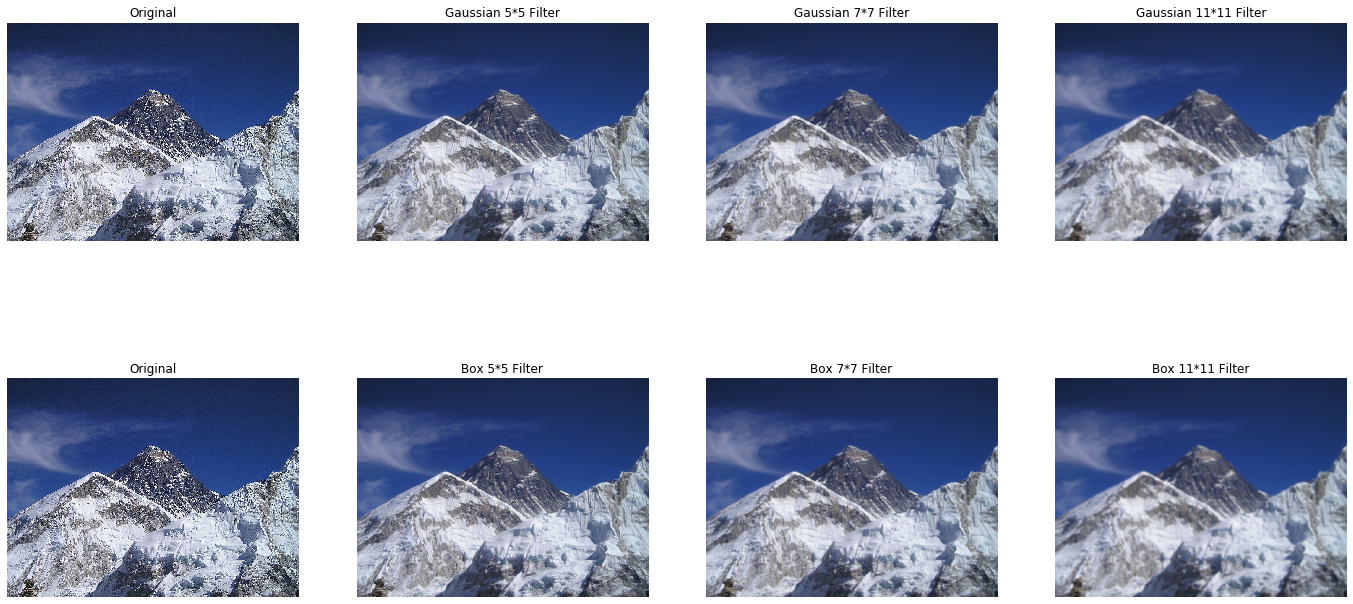

In [202]:
f, axarr = plt.subplots(2,4, figsize = [24,12])

axarr[0,0].imshow(hill)
axarr[0,1].imshow(hill_gaussian_5)
axarr[0,2].imshow(hill_gaussian_7)
axarr[0,3].imshow(hill_gaussian_11)
axarr[1,0].imshow(hill)
axarr[1,1].imshow(hill_box_5)
axarr[1,2].imshow(hill_box_7)
axarr[1,3].imshow(hill_box_11)
axarr[0,0].axis("off")
axarr[0,1].axis("off")
axarr[0,2].axis("off")
axarr[0,3].axis("off")
axarr[1,0].axis("off")
axarr[1,1].axis("off")
axarr[1,2].axis("off")
axarr[1,3].axis("off")

axarr[0,0].set_title("Original")
axarr[0,1].set_title('Gaussian 5*5 Filter')
axarr[0,2].set_title('Gaussian 7*7 Filter')
axarr[0,3].set_title('Gaussian 11*11 Filter')
axarr[1,0].set_title("Original")
axarr[1,1].set_title('Box 5*5 Filter')
axarr[1,2].set_title('Box 7*7 Filter')
axarr[1,3].set_title('Box 11*11 Filter')

### Gaussian Blur tested for another image

In [110]:
random_img = cv2.imread('Images/Images/random.jpeg')
random = cv2.cvtColor(random_img, cv2.COLOR_BGR2RGB)

In [111]:
random_gaussian_5= output_convolved_image(random_img,gauss_v_ker_5,gauss_h_ker_5)
random_gaussian_7= output_convolved_image(random_img,gauss_v_ker_7,gauss_h_ker_7)
random_gaussian_11= output_convolved_image(random_img,gauss_v_ker_11,gauss_h_ker_11)

In [190]:
random_box_5= output_convolved_image(random_img,box_v_ker_5,box_h_ker_5)
random_box_7= output_convolved_image(random_img,box_v_ker_7,box_h_ker_7)
random_box_11= output_convolved_image(random_img,box_v_ker_11,box_h_ker_11)

Text(0.5, 1.0, 'Box 11*11 Filter')

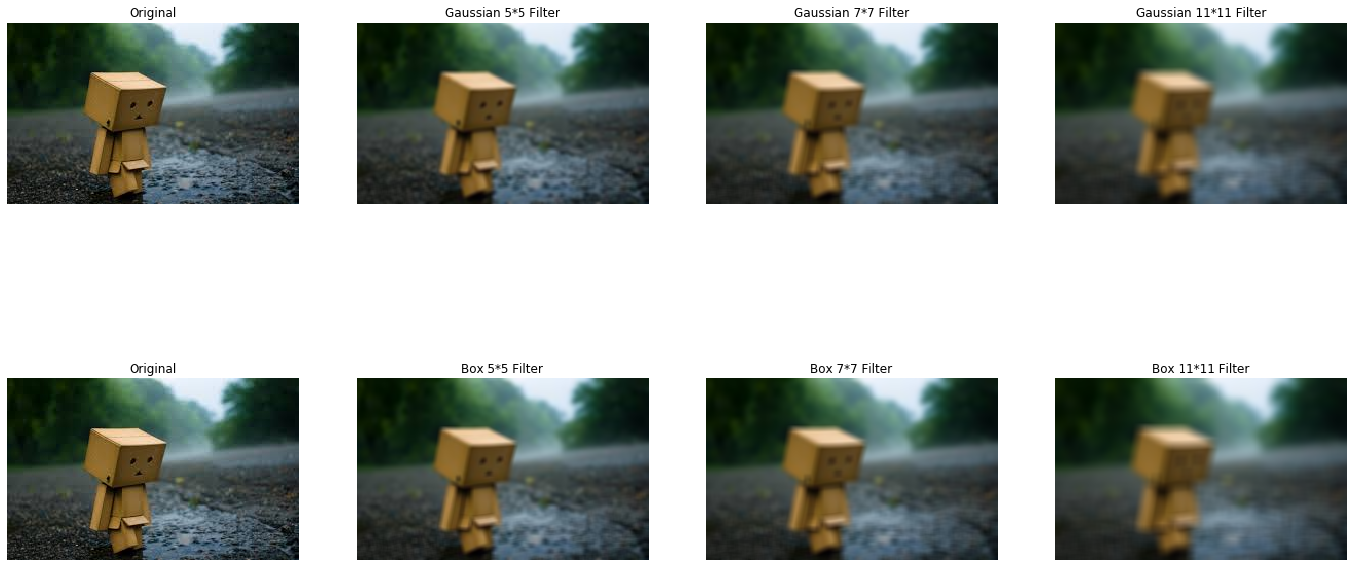

In [201]:
f, axarr = plt.subplots(2,4, figsize = [24,12])

axarr[0,0].imshow(random)
axarr[0,1].imshow(random_gaussian_5)
axarr[0,2].imshow(random_gaussian_7)
axarr[0,3].imshow(random_gaussian_11)
axarr[1,0].imshow(random)
axarr[1,1].imshow(random_box_5)
axarr[1,2].imshow(random_box_7)
axarr[1,3].imshow(random_box_11)
axarr[0,0].axis("off")
axarr[0,1].axis("off")
axarr[0,2].axis("off")
axarr[0,3].axis("off")
axarr[1,0].axis("off")
axarr[1,1].axis("off")
axarr[1,2].axis("off")
axarr[1,3].axis("off")

axarr[0,0].set_title("Original")
axarr[0,1].set_title('Gaussian 5*5 Filter')
axarr[0,2].set_title('Gaussian 7*7 Filter')
axarr[0,3].set_title('Gaussian 11*11 Filter')
axarr[1,0].set_title("Original")
axarr[1,1].set_title('Box 5*5 Filter')
axarr[1,2].set_title('Box 7*7 Filter')
axarr[1,3].set_title('Box 11*11 Filter')

### Code for sharpening the image

#### Using Box or Gaussian or Median Kernel

In [142]:
def sharpen_image(image,generate_kernel=True, amount=1.0):
    if generate_kernel ==False:
        n=int(input("Enter the matrix size"))
        kernel=np.zeros((n,n))
        for i in range(0,n):
            for j in range(0,n):
                kernel[i][j]=input()
        blurred = filter_output(image,kernel)    
    else:
        filter_type= str(input("Provide the name of filter you want to use:"))
        if filter_type=="Gaussian":
            n=int(input("Provide size of filter:"))
            sigma= float(input("Provide value of sigma:"))
            v_ker,h_ker = generate_kernel_for_gaussian(sigma,n)
            blurred = output_convolved_image(image, h_ker,v_ker)
        elif filter_type=="Box":
            n=int(input("Provide size of filter:"))
            v_ker,h_ker = generate_kernel_for_box(n)
            blurred = output_convolved_image(image, h_ker,v_ker)
        elif filter_type=="Median":
            n=int(input("Provide size of filter:"))
            kernel= median_kernel(n)
            blurred= filter_output_median(image,kernel)
        else:
            print("You have to choose between Box or Gaussian or Median")
            return
    
    sharpened = (amount + 1) * image - (amount) * blurred
    #sharpened= image + amount*(image - blurred)
    sharpened = np.maximum(sharpened, np.zeros(sharpened.shape))
    sharpened = np.minimum(sharpened, 255 * np.ones(sharpened.shape))
    sharpened = sharpened.round().astype(np.uint8)
    return sharpened

In [153]:
hill_sharpen_g=sharpen_image(hill_img,amount= .4)

Provide the name of filter you want to use:Gaussian
Provide size of filter:5
Provide value of sigma:1


Text(0.5, 1.0, 'Sharpen using gaussian blur')

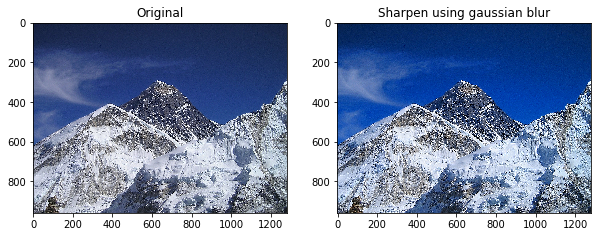

In [154]:
hill_sharpen_rgb_g= cv2.cvtColor(hill_sharpen_g, cv2.COLOR_BGR2RGB)
f, axarr = plt.subplots(1,2)
f.set_figheight(15)
f.set_figwidth(10)
axarr[0].imshow(hill)
axarr[1].imshow(hill_sharpen_rgb_g)
axarr[0].set_title("Original")
axarr[1].set_title('Sharpen using gaussian blur')

In [155]:
hill_sharpen_b=sharpen_image(hill_img,amount=0.4)

Provide the name of filter you want to use:Box
Provide size of filter:5


Text(0.5, 1.0, 'Sharpen using Box blur')

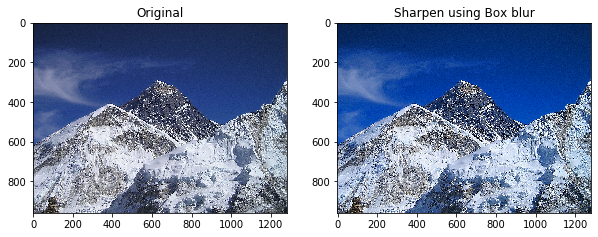

In [156]:
hill_sharpen_rgb_b= cv2.cvtColor(hill_sharpen_b, cv2.COLOR_BGR2RGB)
f, axarr = plt.subplots(1,2)
f.set_figheight(15)
f.set_figwidth(10)
axarr[0].imshow(hill)
axarr[1].imshow(hill_sharpen_rgb_b)
axarr[0].set_title("Original")
axarr[1].set_title('Sharpen using Box blur')

Text(0.5, 1.0, 'Sharpen using Gaussian filter')

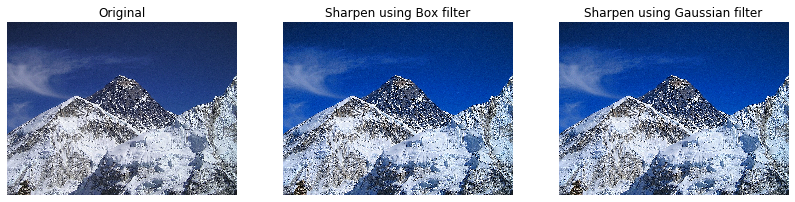

In [157]:
f, axarr = plt.subplots(1,3)
f.set_figheight(14)
f.set_figwidth(14)
axarr[0].imshow(hill)
axarr[0].axis("off")
axarr[1].imshow(hill_sharpen_rgb_b)
axarr[1].axis("off")
axarr[2].imshow(hill_sharpen_rgb_g)
axarr[2].axis("off")


axarr[0].set_title('Original')
axarr[1].set_title('Sharpen using Box filter')
axarr[2].set_title('Sharpen using Gaussian filter')


### Problem 7

### Median Filter

In [158]:
def convolve_with_median(image, kernel,pad_type="Mirror"):
	(iH, iW) = image.shape[:2]
	(kH, kW) = kernel.shape[:2]
	pad = (kW - 1) // 2
	pad_width=[pad,pad,pad,pad]
	image = padding(image,pad_type,pad_width)
	output = np.zeros((iH, iW), dtype="float32")
	for y in np.arange(pad, iH + pad):
		for x in np.arange(pad, iW + pad):

			roi = image[y - pad:y + pad + 1, x - pad:x + pad + 1]
 

			k = np.median(roi * kernel)  ## Here is the change
 
			output[y - pad, x - pad] = k
	output = rescale_intensity(output, in_range=(0, 255))
	output = (output * 255).astype("uint8")
 
	return output

In [159]:
def filter_output_median(image,kernel,pad_type= "Mirror"):
    if len(image.shape)==2 :
        convoleOutput= convolve_with_median(image,kernel,pad_type)
    elif len(image.shape)==3 :
        b, g, r   = image[:, :, 0], image[:, :, 1], image[:, :, 2] # For RGB image
        convolveOutput_b= convolve_with_median(b, kernel,pad_type)
        convolveOutput_g= convolve_with_median(g, kernel,pad_type)
        convolveOutput_r= convolve_with_median(r, kernel,pad_type)
        convoleOutput = np.dstack((convolveOutput_r,convolveOutput_g,convolveOutput_b))  # stacks 3 h x w arrays -> h x w x 3
    else:
        return("Image not in RGB/BGR/Black & White Format")
    return convoleOutput    

In [160]:
noisy_house_img= cv2.imread('Images/noisy_images/house.jpg')
house_noisy = cv2.cvtColor(noisy_house_img, cv2.COLOR_BGR2RGB)

In [161]:
def median_kernel(size):
    return np.ones((size,size), np.int)

In [162]:
median_filter_5 = median_kernel(5) 
median_filter_7 = median_kernel(7)
median_filter_11 = median_kernel(11)

### Check how the median filter works

### For first noisy image 

In [163]:
house_median_5= filter_output_median(noisy_house_img, median_filter_5)
house_median_7= filter_output_median(noisy_house_img, median_filter_7)
house_median_11= filter_output_median(noisy_house_img, median_filter_11)

Text(0.5, 1.0, 'Median Filter- 11*11 kernel')

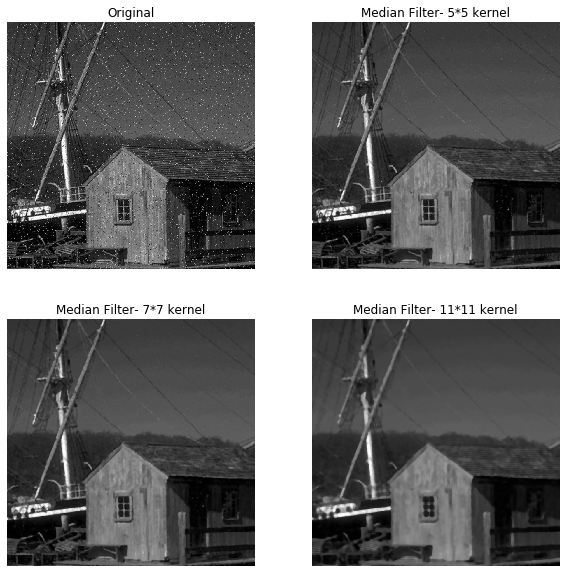

In [165]:
f, axarr = plt.subplots(2,2)
f.set_figheight(10)
f.set_figwidth(10)
axarr[0,0].imshow(house_noisy)
axarr[0,0].axis("off")
axarr[0,1].imshow(house_median_5)
axarr[0,1].axis("off")
axarr[1,0].imshow(house_median_7)
axarr[1,0].axis("off")
axarr[1,1].imshow(house_median_11)
axarr[1,1].axis("off")

axarr[0,0].set_title("Original")
axarr[0,1].set_title('Median Filter- 5*5 kernel')
axarr[1,0].set_title('Median Filter- 7*7 kernel')
axarr[1,1].set_title('Median Filter- 11*11 kernel')

####  It also helps in smoothing which is clear from the outputs.

### For second noisy image

In [166]:
ship_img= cv2.imread('Images/noisy_images/ship.png')
ship = cv2.cvtColor(ship_img, cv2.COLOR_BGR2RGB)

In [167]:
ship_img.shape

(512, 512, 3)

In [168]:
ship_median_5= filter_output_median(ship_img, median_filter_5)
ship_median_7= filter_output_median(ship_img, median_filter_7)
ship_median_11= filter_output_median(ship_img, median_filter_11)

Text(0.5, 1.0, 'Median Filter- 11*11 kernel')

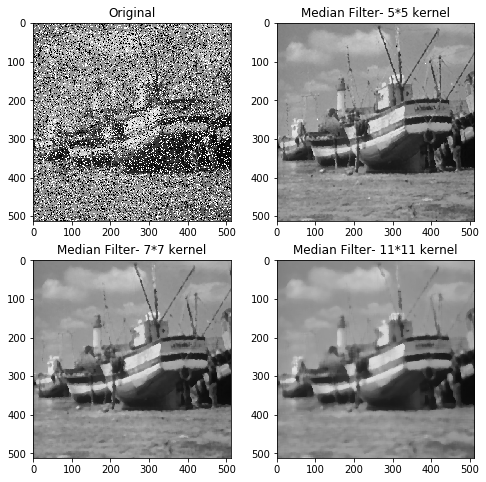

In [170]:
f, axarr = plt.subplots(2,2)
f.set_figheight(8)
f.set_figwidth(8)
axarr[0,0].imshow(ship)
axarr[0,1].imshow(ship_median_5)
axarr[1,0].imshow(ship_median_7)
axarr[1,1].imshow(ship_median_11)

axarr[0,0].set_title("Original")
axarr[0,1].set_title('Median Filter- 5*5 kernel')
axarr[1,0].set_title('Median Filter- 7*7 kernel')
axarr[1,1].set_title('Median Filter- 11*11 kernel')

### Sharpening an image using median filter

#### One case is shown using 5*5 kernel

#### Function sharpen_image (written earlier) is used.

In [172]:
hill_sharpen_me=sharpen_image(hill_img,amount= 0.5 )

Provide the name of filter you want to use:Median
Provide size of filter:5


Text(0.5, 1.0, 'Sharpen using median blur')

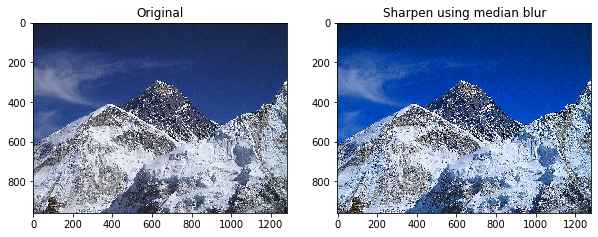

In [173]:
hill_sharpen_rgb_me= cv2.cvtColor(hill_sharpen_me, cv2.COLOR_BGR2RGB)
f, axarr = plt.subplots(1,2)
f.set_figheight(15)
f.set_figwidth(10)
axarr[0].imshow(hill)
axarr[1].imshow(hill_sharpen_rgb_me)
axarr[0].set_title("Original")
axarr[1].set_title('Sharpen using median blur')

### Problem 8

### Sharpening using Box, Gaussian and Median filters

In [174]:
waterfall_img=cv2.imread("Images/Images/waterfall.jpg")

In [180]:
waterfall_sharpen_me=sharpen_image(waterfall_img,0.5)

Provide the name of filter you want to use:Median
Provide size of filter:5


In [182]:
waterfall_sharpen_g=sharpen_image(waterfall_img,0.5)

Provide the name of filter you want to use:Gaussian
Provide size of filter:5
Provide value of sigma:1


In [184]:
waterfall= cv2.cvtColor(waterfall_img, cv2.COLOR_BGR2RGB)
waterfall_sharpen_rgb_me= cv2.cvtColor(waterfall_sharpen_me, cv2.COLOR_BGR2RGB)
waterfall_sharpen_rgb_g= cv2.cvtColor(waterfall_sharpen_g, cv2.COLOR_BGR2RGB)
waterfall_sharpen_rgb_b= cv2.cvtColor(waterfall_sharpen_b, cv2.COLOR_BGR2RGB)

Text(0.5, 1.0, 'Sharpen using median blur')

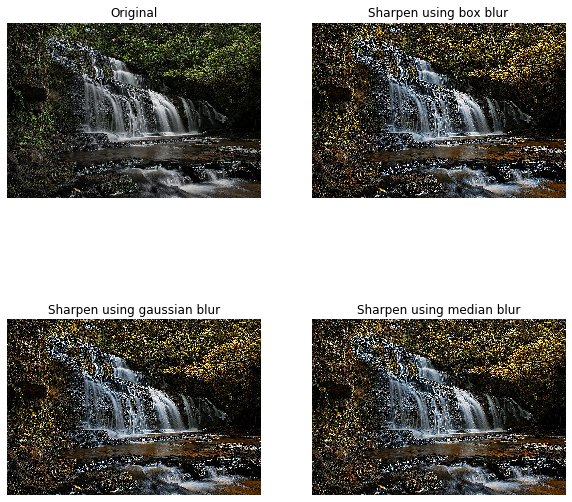

In [186]:
f, axarr = plt.subplots(2,2)
f.set_figheight(10)
f.set_figwidth(10)
axarr[0,0].imshow(waterfall)
axarr[0,1].imshow(waterfall_sharpen_rgb_b)
axarr[1,0].imshow(waterfall_sharpen_rgb_g)
axarr[1,1].imshow(waterfall_sharpen_rgb_me)
axarr[0,0].axis("off")
axarr[0,1].axis("off")
axarr[1,0].axis("off")
axarr[1,1].axis("off")

axarr[0,0].set_title("Original")
axarr[0,1].set_title('Sharpen using box blur')
axarr[1,0].set_title('Sharpen using gaussian blur')
axarr[1,1].set_title('Sharpen using median blur')

### Sharpening on a human face

In [214]:
human_sharpen_me_5=sharpen_image(human_img,1)
human_sharpen_me_7=sharpen_image(human_img,1)
human_sharpen_me_11=sharpen_image(human_img,1)

Provide the name of filter you want to use:Median
Provide size of filter:5
Provide the name of filter you want to use:Median
Provide size of filter:7
Provide the name of filter you want to use:Median
Provide size of filter:11


In [215]:
human_sharpen_b_5=sharpen_image(human_img,1)
human_sharpen_b_7=sharpen_image(human_img,1)
human_sharpen_b_11=sharpen_image(human_img,1)

Provide the name of filter you want to use:Box
Provide size of filter:5
Provide the name of filter you want to use:Box
Provide size of filter:7
Provide the name of filter you want to use:Box
Provide size of filter:11


In [216]:
human_sharpen_g_5=sharpen_image(human_img,1)
human_sharpen_g_7=sharpen_image(human_img,1)
human_sharpen_g_11=sharpen_image(human_img,1)

Provide the name of filter you want to use:Gaussian
Provide size of filter:5
Provide value of sigma:1
Provide the name of filter you want to use:Gaussian
Provide size of filter:7
Provide value of sigma:1
Provide the name of filter you want to use:Gaussian
Provide size of filter:11
Provide value of sigma:1


In [217]:
human= cv2.cvtColor(human_img, cv2.COLOR_BGR2RGB)
human_sharpen_rgb_me_5= cv2.cvtColor(human_sharpen_me_5, cv2.COLOR_BGR2RGB)
human_sharpen_rgb_me_7= cv2.cvtColor(human_sharpen_me_7, cv2.COLOR_BGR2RGB)
human_sharpen_rgb_me_11= cv2.cvtColor(human_sharpen_me_11, cv2.COLOR_BGR2RGB)
human_sharpen_rgb_b_5= cv2.cvtColor(human_sharpen_b_5, cv2.COLOR_BGR2RGB)
human_sharpen_rgb_b_7= cv2.cvtColor(human_sharpen_b_7, cv2.COLOR_BGR2RGB)
human_sharpen_rgb_b_11= cv2.cvtColor(human_sharpen_b_11, cv2.COLOR_BGR2RGB)
human_sharpen_rgb_g_5= cv2.cvtColor(human_sharpen_g_5, cv2.COLOR_BGR2RGB)
human_sharpen_rgb_g_7= cv2.cvtColor(human_sharpen_g_7, cv2.COLOR_BGR2RGB)
human_sharpen_rgb_g_11= cv2.cvtColor(human_sharpen_g_11, cv2.COLOR_BGR2RGB)


Text(0.5, 1.0, 'Median 11*11 Filter')

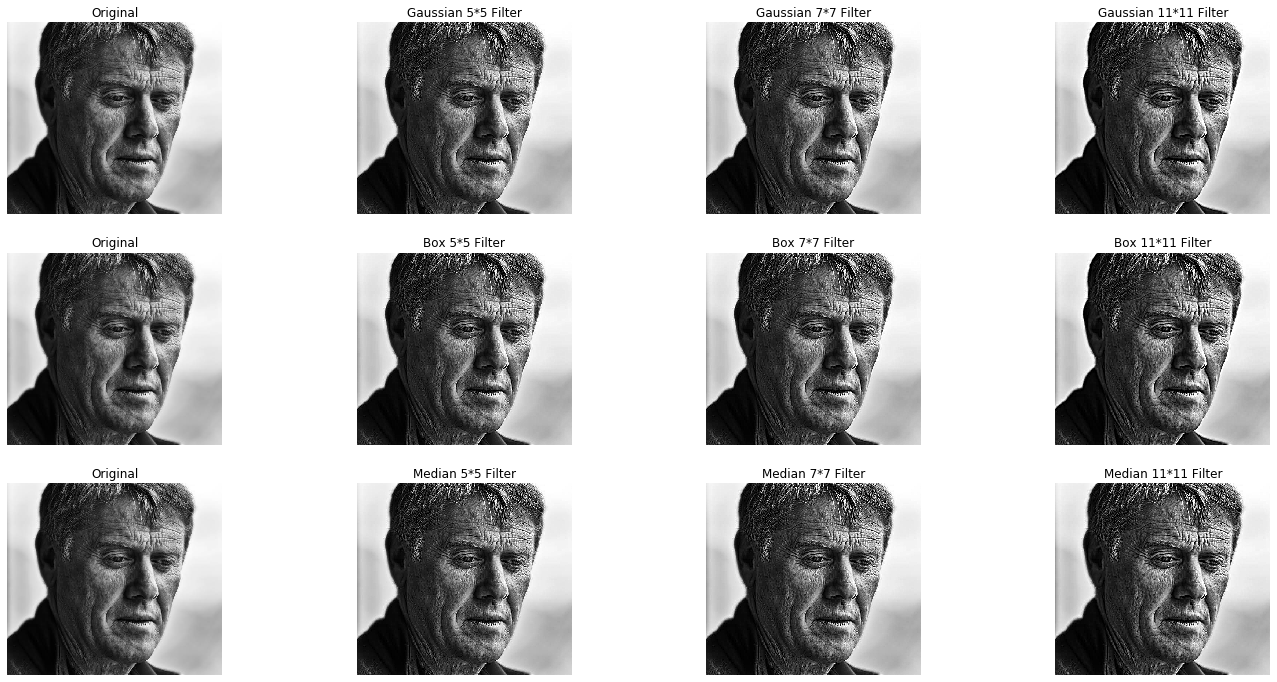

In [218]:
f, axarr = plt.subplots(3,4, figsize = [24,12])

axarr[0,0].imshow(human)
axarr[0,1].imshow(human_sharpen_rgb_g_5)
axarr[0,2].imshow(human_sharpen_rgb_g_7)
axarr[0,3].imshow(human_sharpen_rgb_g_11)
axarr[1,0].imshow(human)
axarr[1,1].imshow(human_sharpen_rgb_b_5)
axarr[1,2].imshow(human_sharpen_rgb_g_7)
axarr[1,3].imshow(human_sharpen_rgb_b_11)
axarr[2,0].imshow(human)
axarr[2,1].imshow(human_sharpen_rgb_me_5)
axarr[2,2].imshow(human_sharpen_rgb_me_7)
axarr[2,3].imshow(human_sharpen_rgb_me_11)
axarr[0,0].axis("off")
axarr[0,1].axis("off")
axarr[0,2].axis("off")
axarr[0,3].axis("off")
axarr[1,0].axis("off")
axarr[1,1].axis("off")
axarr[1,2].axis("off")
axarr[1,3].axis("off")
axarr[2,0].axis("off")
axarr[2,1].axis("off")
axarr[2,2].axis("off")
axarr[2,3].axis("off")

axarr[0,0].set_title("Original")
axarr[0,1].set_title('Gaussian 5*5 Filter')
axarr[0,2].set_title('Gaussian 7*7 Filter')
axarr[0,3].set_title('Gaussian 11*11 Filter')
axarr[1,0].set_title("Original")
axarr[1,1].set_title('Box 5*5 Filter')
axarr[1,2].set_title('Box 7*7 Filter')
axarr[1,3].set_title('Box 11*11 Filter')
axarr[2,0].set_title("Original")
axarr[2,1].set_title('Median 5*5 Filter')
axarr[2,2].set_title('Median 7*7 Filter')
axarr[2,3].set_title('Median 11*11 Filter')